In [2]:
import pandas as pd
import numpy as np

from analyze_src.basic_data_inspection import DataInspector, DataTypesInspectionStrategy, SummaryStatisticsInspectionStrategy
from analyze_src.missing_values_analysis import SimpleMissingValuesAnalysis
from analyze_src.univariate_analysis import UnivariateAnalyzer, NumericalUnivariateAnalysis, CategoricalUnivariateAnalysis
from analyze_src.bivariate_analysis import BivariateAnalyzer, NumericalVsNumericalAnalysis, CategoricalVsNumericalAnalysis
from analyze_src.multivariate_analysis import SimpleMultivariateAnalysis

# Set display options for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [3]:
# Load the data
# We have already extracted the data into the 'extracted-data' folder
data_path = '/mnt/c/Users/HP/ml_projects/predictive_maintenance/extracted_data/predictive_maintenance.csv'
df = pd.read_csv(data_path)
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure


In [ ]:
# Step 1: Basic Data Inspection
# ------------------------------------
# Initialize the Data Inspector with a strategy for Inspection
data_inspector = DataInspector(DataTypesInspectionStrategy())
data_inspector.execute_inspection(df)


 Data Types and Non-null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB
None


In [5]:
# Switch strategy to Summary Statistics Inspection
data_inspector.set_strategy(SummaryStatisticsInspectionStrategy())
data_inspector.execute_inspection(df)


Summary Statistics (Numerical Features):
               UDI  Air temperature [K]  Process temperature [K]  \
count  10000.00000         10000.000000             10000.000000   
mean    5000.50000           300.004930               310.005560   
std     2886.89568             2.000259                 1.483734   
min        1.00000           295.300000               305.700000   
25%     2500.75000           298.300000               308.800000   
50%     5000.50000           300.100000               310.100000   
75%     7500.25000           301.500000               311.100000   
max    10000.00000           304.500000               313.800000   

       Rotational speed [rpm]   Torque [Nm]  Tool wear [min]        Target  
count            10000.000000  10000.000000     10000.000000  10000.000000  
mean              1538.776100     39.986910       107.951000      0.033900  
std                179.284096      9.968934        63.654147      0.180981  
min               1168.000000      3.


Missing Values Count by Column:
Series([], dtype: int64)

Visualizing Missing Values...


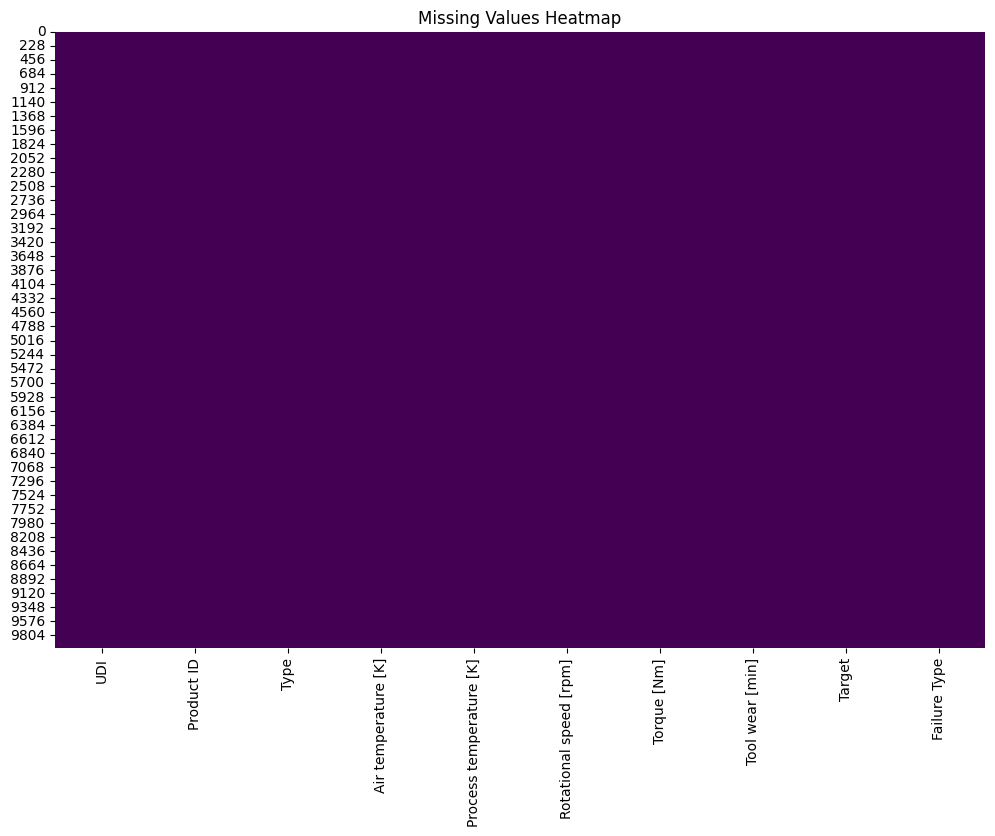

In [6]:
# Step 2: Missing Values Analysis
# ------------------------------------
# Perform Missing Values Analysis
missing_values_analyzer = SimpleMissingValuesAnalysis()
missing_values_analyzer.analyze(df)

# Missing Values Heatmap Insights

No missing values found.

# Insights

#### **1. Data Types and Non-null Counts:**
- The dataset contains **10000 entries** and **10 columns**.
- **Data Types**: There are 3 columns with `float64` data type, 4 columns with `int64` data type, and 3 columns with `object` data type.
  - **Numerical Features**: These include features like `UDI`, `Air temperature [K]`, `Process temperature [k]`, `Rotational speed [rpm]`, etc.
  - **Categorical Features**: `Type`, `Product ID`, `Failure Type`.

#### **2. Summary Statistics:**
- **Numerical Features**:
  - The target variable `Target` has a mean of **0.033900** which suggests that the data, on average, is centered around zero and a standard deviation of **0.180981**,  indicating a high spread.
  - `Air Temperature [k]` ranges from **295.5 [k] to 304.5 [k]**, with a mean of **300 [k]**, showing a relatively high temperature on average.
  - `Process Temperature [k]` ranges from **305.7 [k] to 310.8**, with a mean of **310 [k]**, showing a relatively high temperature on average.
  - `Rotational speed [rpm]` ranges from **1168 [rpm] to 2886 [rpm]**, with a mean of **1538 [rpm]**, indicating that the average rotational speed is closer to the lower end of the recorded range, which spans from 1168 rpm to 2886 rpm.
  - `Torque [Nm]` ranges from **3.8 [Nm] to 76.6 [Nm]** with a mean of **39.9 [Nm]**, indicating that the average torque is closer to the lower end of the recorded range, which spans from 33.2 Nm to 67.6 rpm.
  - `Tool wear [min]` ranges from **53 [min] to 253 [min]** with a mean of **63.6 [min]**, 


- **Categorical Features**:
  - **Type** has **3 unique values**, with `L` being the most common, suggesting that Low is the dominant type in the dataset.
  - **Failure Type** is mostly `No Failure` which appears 9652 times (96.52% of the data) with **6 unique failure types**, indicating that the Failure Type feature is highly imbalanced.

### **Issues to be Addressed Later**

1. **Imbalanced Data**:
   - `Target` variable is 

2. **Outlier Detection and Handling**:
   - Features like ``, ``, ``, and `` show a significant range, indicating potential outliers. These will need to be detected and handled appropriately to avoid skewing model predictions.
  

3. **Categorical Encoding**:
   - Categorical feature `Type` has many unique values. Decisions need to be made on how to encode `Type` (e.g., one-hot encoding, label encoding, or frequency encoding) based on its relationship with the target variables `Target` and `Failure Type`. 

4. **Feature Engineering**:
   - Based on the insights, certain features might need to be engineered (e.g., combining related features, creating interaction terms, or transforming skewed features) to better capture the relationships in the data.

5. **Correlation and Multicollinearity**:
    - Some features might be highly correlated with each other (e.g., basement-related features). This could lead to multicollinearity issues, which need to be addressed during feature selection.